# Carga de datos

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('nutricion_2016.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Transformación de variables categóricas

from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])


datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)

        
datosCodificados

In [2]:
#Para categorias específicas
uniq_lab = np.unique(df['regimen'])#Categorías de categoría regimen
for lab in uniq_lab:#Ciclo para cada categoría 
    df['regimen'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) #Se reemplaza la variable categórica por la numérica  

uniq_lab = np.unique( df['eps'])#Categorías de característica eps
for lab in uniq_lab:
    df['eps'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['sexo'])#Categorías de característica sexo
for lab in uniq_lab:
    df['sexo'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['peso_edad_denomina'])#Categorías de característica peso_edad_denomina
for lab in uniq_lab:
    df['peso_edad_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 

uniq_lab = np.unique(df['talla_edad_denomina'])#Categorías de categoría talla_edad_denomina
for lab in uniq_lab:
    df['talla_edad_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 

uniq_lab = np.unique( df['peso_talla_denomina'])#Categorías de característica peso_talla_denomina
for lab in uniq_lab:
    df['peso_talla_denomina'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['comuna'])#Categorías de característica comuna
for lab in uniq_lab:
    df['comuna'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['zona'])#Categorías de característica zona
for lab in uniq_lab:
    df['zona'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    


# Revisión de valores nan

from sklearn import preprocessing
from collections import defaultdict

nombreCol = datos.columns.tolist()

for column in nombreCol:
    print("Valores nulos <{0}>: {1}".format(column, datos[column].isnull().sum()))


In [3]:
from sklearn.impute import SimpleImputer

estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(df)

  
labels = []
for c in df:
    labels.append(c)


df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

# Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,regimen,eps,sexo,peso,estatura,peso_edad_ds,peso_edad_denomina,talla_edad_ds,talla_edad_denomina,peso_talla_ds,peso_talla_denomina,comuna,zona,grupo_etario,Edad_anos
0,2,15,1,11.40,79,0.04,0,-1.85,3,1.24,8,14,3,1,1
1,0,11,0,11.90,86,0.75,0,1.11,0,0.17,3,8,0,1,1
4,0,11,0,8.40,72,-0.55,0,-0.85,0,-0.22,3,3,1,1,1
5,0,11,1,9.30,74,0.03,0,0.08,0,0.00,3,16,2,1,0
8,0,11,1,8.40,66,-0.17,0,-1.52,3,0.99,3,8,0,1,0
9,0,11,0,8.50,75,-1.36,4,-1.62,3,-0.83,3,17,0,1,1
10,0,11,0,18.50,107,0.16,0,-0.42,0,0.60,3,2,6,2,5
13,2,15,0,11.00,78,0.31,0,-1.48,3,1.37,8,2,6,1,1
14,0,5,0,16.00,101,-0.11,0,-0.53,0,0.34,3,17,0,2,4
15,0,11,1,12.60,84,1.22,3,0.53,0,1.34,8,9,1,1,1


# Escalamiento de datos

In [5]:
from matplotlib import pyplot # Librería para hacer gráficas
import random # para generar datos aleatorios de forma uniforme 
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los
                                                 #datos cuando ajustes de valores máximos y mínimos.  
    
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosNuevos[:,0].min(), datosNuevos[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosNuevos[:,1].min(), datosNuevos[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Regimen') # Etiqueta del eje x
pyplot.ylabel('EPS') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosEscalados[:,0].min(), datosEscalados[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosEscalados[:,1].min(), datosEscalados[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Regimen') # Etiqueta del eje x
pyplot.ylabel('EPS') # Etiqueta del eje y

pyplot.show()

<Figure size 1200x500 with 2 Axes>

# Normalización 

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
        
datosNormalizados

#Solo se usa si es necesario

array([[0.66666667, 0.92857143, 1.        , ..., 0.5       , 0.        ,
        0.2       ],
       [0.        , 0.64285714, 0.        , ..., 0.        , 0.        ,
        0.2       ],
       [0.        , 0.64285714, 0.        , ..., 0.16666667, 0.        ,
        0.2       ],
       ...,
       [0.66666667, 0.92857143, 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.33333333, 0.71428571, 1.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.64285714, 1.        , ..., 0.16666667, 0.5       ,
        0.4       ]])

# Reducción de Dimensionalidad

In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 15, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([1.99002358e-01, 1.69582899e-01, 1.59840793e-01, 1.29576542e-01,
       7.96484101e-02, 7.63370359e-02, 6.57249065e-02, 4.41789012e-02,
       2.81325247e-02, 2.11009669e-02, 1.52192346e-02, 9.43233202e-03,
       1.88195529e-03, 2.34463852e-04, 1.06677162e-04])

[0.19900236 0.36858526 0.52842605 0.65800259 0.737651   0.81398804
 0.87971294 0.92389185 0.95202437 0.97312534 0.98834457 0.9977769
 0.99965886 0.99989332 1.        ]


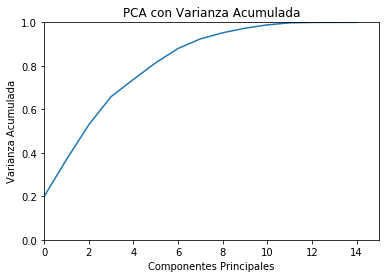

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([131.71509833, 121.58989325, 118.04572455, 106.28442868,
        83.32877647,  81.57819574,  75.69573983,  62.06030482,
        49.52343999,  42.89015617,  36.42527638,  28.67582948,
        12.80887833,   4.52110296,   3.04959506])

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(55816, 15)
(55816, 9)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(55816, 15)

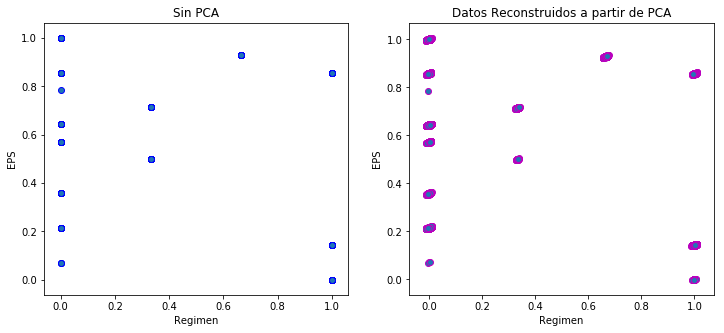

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Regimen')
pyplot.ylabel('EPS')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Regimen')
pyplot.ylabel('EPS')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# K MEANS


Para  2  Clusters: 
El total de datos de la clase  0  son:  28303
El total de datos de la clase  1  son:  27513
Para  3  Clusters: 
El total de datos de la clase  0  son:  20346
El total de datos de la clase  1  son:  15259
El total de datos de la clase  2  son:  20211
Para  4  Clusters: 
El total de datos de la clase  0  son:  15903
El total de datos de la clase  1  son:  15789
El total de datos de la clase  2  son:  12587
El total de datos de la clase  3  son:  11537
Para  5  Clusters: 
El total de datos de la clase  0  son:  10557
El total de datos de la clase  1  son:  6993
El total de datos de la clase  2  son:  7908
El total de datos de la clase  3  son:  15240
El total de datos de la clase  4  son:  15118
Para  6  Clusters: 
El total de datos de la clase  0  son:  9442
El total de datos de la clase  1  son:  8815
El total de datos de la clase  2  son:  10560
El total de datos de la clase  3  son:  8859
El total de datos de la clase  4  son:  9206
El total de datos de la clase  5

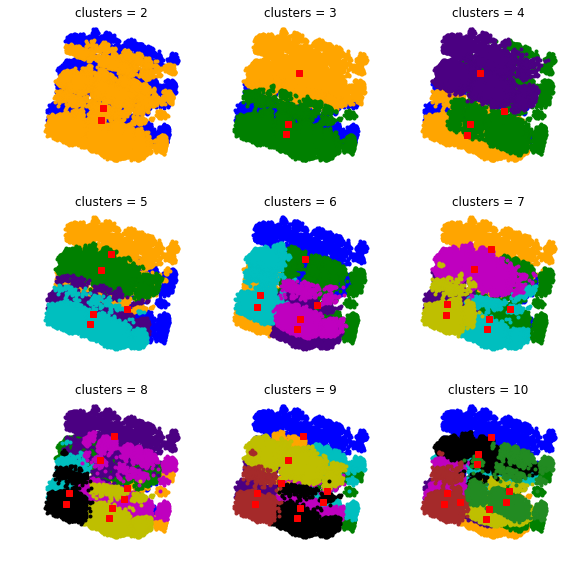

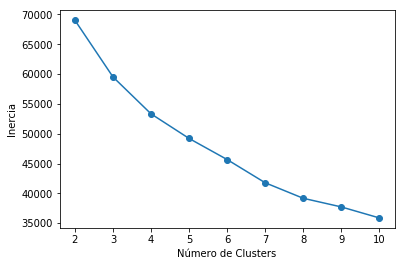

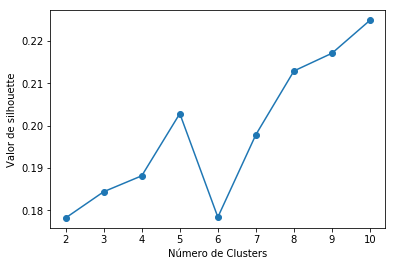

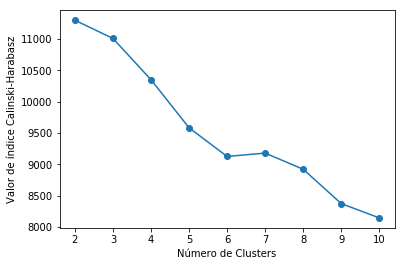

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabasz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])
    
    print("Para ", ncenters, " Clusters: ")   
    for i in range (len(np.unique(Etiquetas))):
        
        print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))
    
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

## DBSCAN

Se realiza la prueba con eps: 0.1
y con minimas muestras: 50
Número estimado de datos con ruido: 55672
El total de datos de la clase  0  son:  88
El total de datos de la clase  1  son:  56


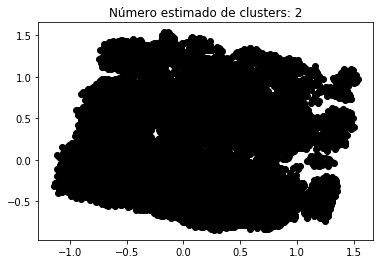

Se realiza la prueba con eps: 0.1
y con minimas muestras: 200
Número estimado de datos con ruido: 55816


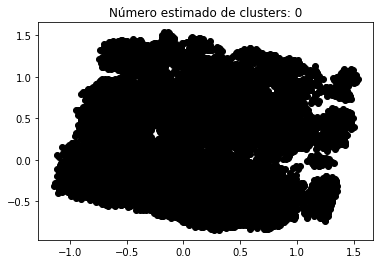

Se realiza la prueba con eps: 0.1
y con minimas muestras: 500
Número estimado de datos con ruido: 55816


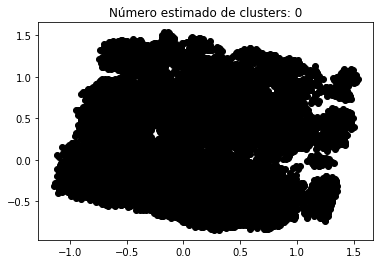

Se realiza la prueba con eps: 0.1
y con minimas muestras: 1000
Número estimado de datos con ruido: 55816


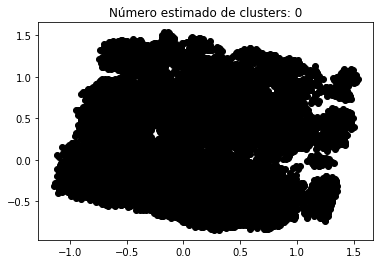

Se realiza la prueba con eps: 0.1
y con minimas muestras: 5000
Número estimado de datos con ruido: 55816


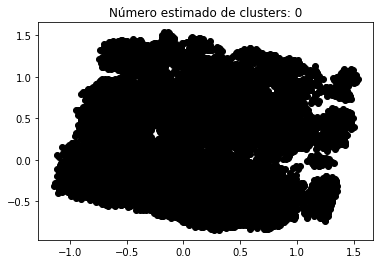

Se realiza la prueba con eps: 0.3
y con minimas muestras: 50
Número estimado de datos con ruido: 17527
El total de datos de la clase  0  son:  7357
El total de datos de la clase  1  son:  7354
El total de datos de la clase  2  son:  1221
El total de datos de la clase  3  son:  2007
El total de datos de la clase  4  son:  606
El total de datos de la clase  5  son:  225
El total de datos de la clase  6  son:  1829
El total de datos de la clase  7  son:  621
El total de datos de la clase  8  son:  2041
El total de datos de la clase  9  son:  87
El total de datos de la clase  10  son:  1226
El total de datos de la clase  11  son:  51
El total de datos de la clase  12  son:  1179
El total de datos de la clase  13  son:  68
El total de datos de la clase  14  son:  83
El total de datos de la clase  15  son:  79
El total de datos de la clase  16  son:  269
El total de datos de la clase  17  son:  236
El total de datos de la clase  18  son:  218
El total de datos de la clase  19  son:  252
El t

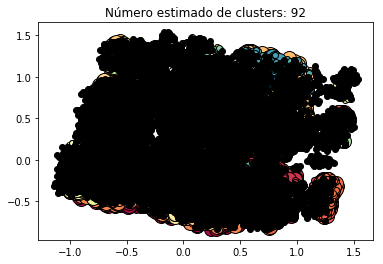

Se realiza la prueba con eps: 0.3
y con minimas muestras: 200
Número estimado de datos con ruido: 37214
El total de datos de la clase  0  son:  3712
El total de datos de la clase  1  son:  421
El total de datos de la clase  2  son:  1304
El total de datos de la clase  3  son:  3328
El total de datos de la clase  4  son:  889
El total de datos de la clase  5  son:  1413
El total de datos de la clase  6  son:  842
El total de datos de la clase  7  son:  424
El total de datos de la clase  8  son:  614
El total de datos de la clase  9  son:  296
El total de datos de la clase  10  son:  586
El total de datos de la clase  11  son:  345
El total de datos de la clase  12  son:  295
El total de datos de la clase  13  son:  339
El total de datos de la clase  14  son:  394
El total de datos de la clase  15  son:  574
El total de datos de la clase  16  son:  246
El total de datos de la clase  17  son:  415
El total de datos de la clase  18  son:  469
El total de datos de la clase  19  son:  447
El

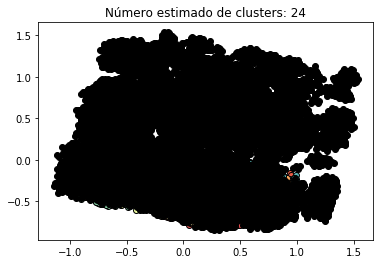

Se realiza la prueba con eps: 0.3
y con minimas muestras: 500
Número estimado de datos con ruido: 52619
El total de datos de la clase  0  son:  1052
El total de datos de la clase  1  son:  775
El total de datos de la clase  2  son:  673
El total de datos de la clase  3  son:  697


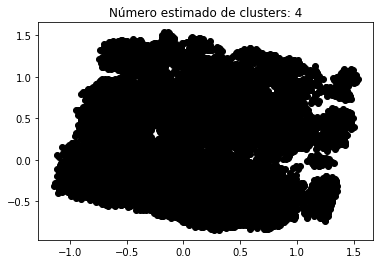

Se realiza la prueba con eps: 0.3
y con minimas muestras: 1000
Número estimado de datos con ruido: 55816


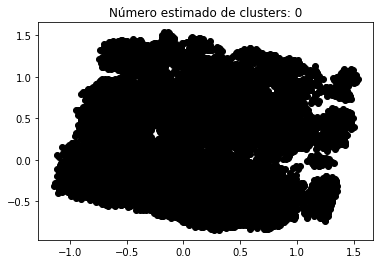

Se realiza la prueba con eps: 0.3
y con minimas muestras: 5000
Número estimado de datos con ruido: 55816


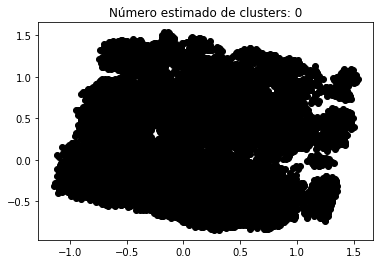

Se realiza la prueba con eps: 0.5
y con minimas muestras: 50
Número estimado de datos con ruido: 1880
El total de datos de la clase  0  son:  16996
El total de datos de la clase  1  son:  17508
El total de datos de la clase  2  son:  2271
El total de datos de la clase  3  son:  1331
El total de datos de la clase  4  son:  4950
El total de datos de la clase  5  son:  3737
El total de datos de la clase  6  son:  2480
El total de datos de la clase  7  son:  1085
El total de datos de la clase  8  son:  900
El total de datos de la clase  9  son:  871
El total de datos de la clase  10  son:  212
El total de datos de la clase  11  son:  1401
El total de datos de la clase  12  son:  194


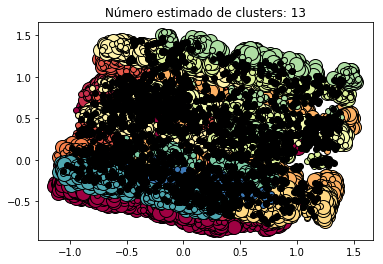

Se realiza la prueba con eps: 0.5
y con minimas muestras: 200
Número estimado de datos con ruido: 9673
El total de datos de la clase  0  son:  13209
El total de datos de la clase  1  son:  13451
El total de datos de la clase  2  son:  3574
El total de datos de la clase  3  son:  849
El total de datos de la clase  4  son:  3571
El total de datos de la clase  5  son:  818
El total de datos de la clase  6  son:  1576
El total de datos de la clase  7  son:  2770
El total de datos de la clase  8  son:  1271
El total de datos de la clase  9  son:  2685
El total de datos de la clase  10  son:  501
El total de datos de la clase  11  son:  477
El total de datos de la clase  12  son:  643
El total de datos de la clase  13  son:  544
El total de datos de la clase  14  son:  204


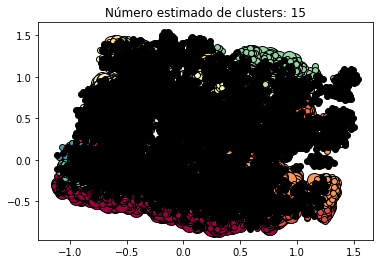

Se realiza la prueba con eps: 0.5
y con minimas muestras: 500
Número estimado de datos con ruido: 21991
El total de datos de la clase  0  son:  12248
El total de datos de la clase  1  son:  12454
El total de datos de la clase  2  son:  2901
El total de datos de la clase  3  son:  3199
El total de datos de la clase  4  son:  1157
El total de datos de la clase  5  son:  656
El total de datos de la clase  6  son:  441
El total de datos de la clase  7  son:  769


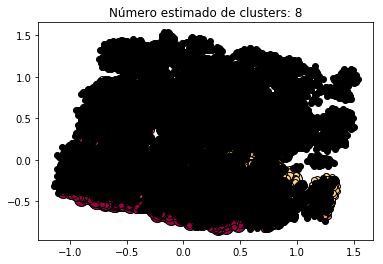

Se realiza la prueba con eps: 0.5
y con minimas muestras: 1000
Número estimado de datos con ruido: 30116
El total de datos de la clase  0  son:  11177
El total de datos de la clase  1  son:  10845
El total de datos de la clase  2  son:  1833
El total de datos de la clase  3  son:  1845


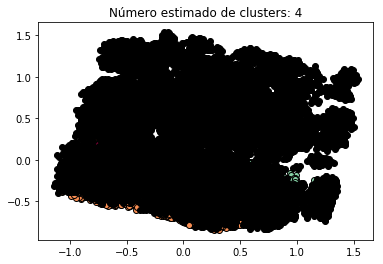

Se realiza la prueba con eps: 0.5
y con minimas muestras: 5000
Número estimado de datos con ruido: 55816


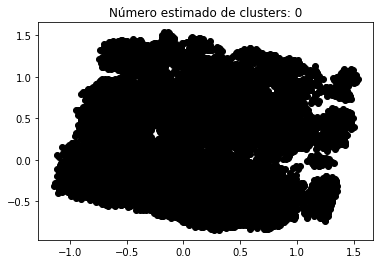

Se realiza la prueba con eps: 0.7
y con minimas muestras: 50
Número estimado de datos con ruido: 93
El total de datos de la clase  0  son:  21341
El total de datos de la clase  1  son:  21974
El total de datos de la clase  2  son:  6278
El total de datos de la clase  3  son:  6130


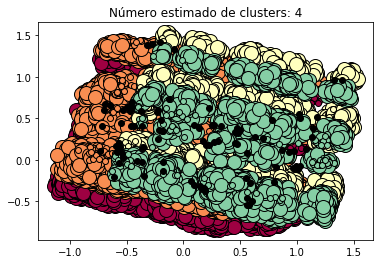

Se realiza la prueba con eps: 0.7
y con minimas muestras: 200
Número estimado de datos con ruido: 1119
El total de datos de la clase  0  son:  21115
El total de datos de la clase  1  son:  21771
El total de datos de la clase  2  son:  5045
El total de datos de la clase  3  son:  4930
El total de datos de la clase  4  son:  931
El total de datos de la clase  5  son:  905


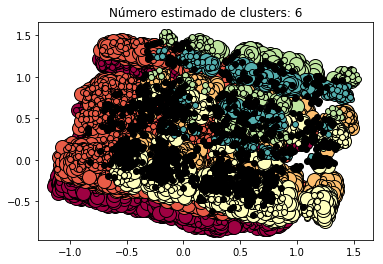

Se realiza la prueba con eps: 0.7
y con minimas muestras: 500
Número estimado de datos con ruido: 5037
El total de datos de la clase  0  son:  18330
El total de datos de la clase  1  son:  18658
El total de datos de la clase  2  son:  4782
El total de datos de la clase  3  son:  4915
El total de datos de la clase  4  son:  2160
El total de datos de la clase  5  son:  1934


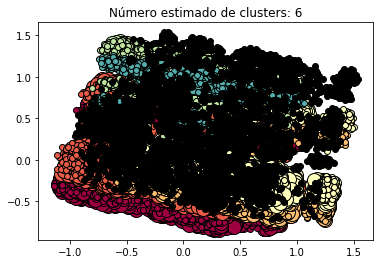

Se realiza la prueba con eps: 0.7
y con minimas muestras: 1000
Número estimado de datos con ruido: 13529
El total de datos de la clase  0  son:  16797
El total de datos de la clase  1  son:  17215
El total de datos de la clase  2  son:  4061
El total de datos de la clase  3  son:  4214


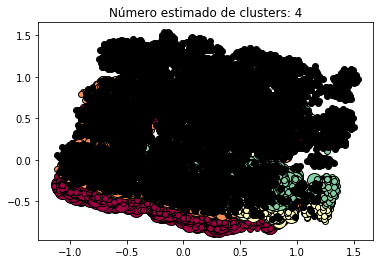

Se realiza la prueba con eps: 0.7
y con minimas muestras: 5000
Número estimado de datos con ruido: 50792
El total de datos de la clase  0  son:  5024


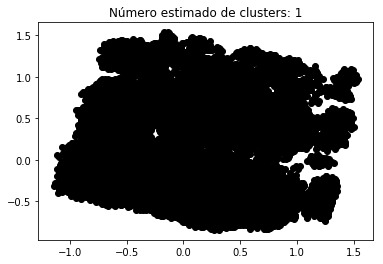

Se realiza la prueba con eps: 0.9
y con minimas muestras: 50
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  28303


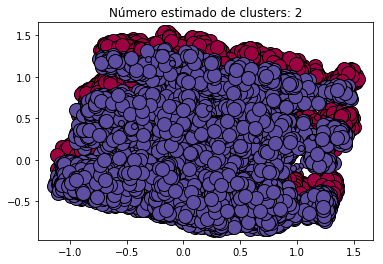

Se realiza la prueba con eps: 0.9
y con minimas muestras: 200
Número estimado de datos con ruido: 3
El total de datos de la clase  0  son:  28301
El total de datos de la clase  1  son:  27512


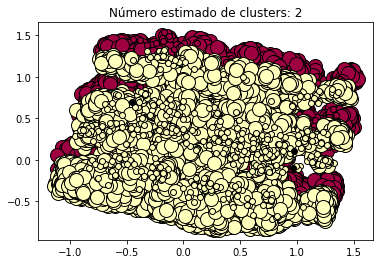

Se realiza la prueba con eps: 0.9
y con minimas muestras: 500
Número estimado de datos con ruido: 54
El total de datos de la clase  0  son:  27485
El total de datos de la clase  1  son:  28277


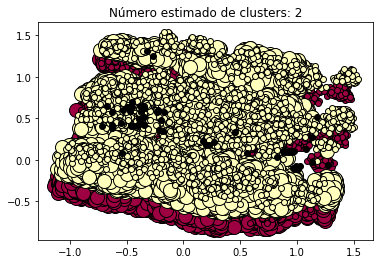

Se realiza la prueba con eps: 0.9
y con minimas muestras: 1000
Número estimado de datos con ruido: 1928
El total de datos de la clase  0  son:  26562
El total de datos de la clase  1  son:  25133
El total de datos de la clase  2  son:  2193


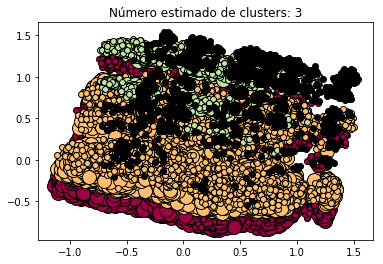

Se realiza la prueba con eps: 0.9
y con minimas muestras: 5000
Número estimado de datos con ruido: 17617
El total de datos de la clase  0  son:  18602
El total de datos de la clase  1  son:  19597


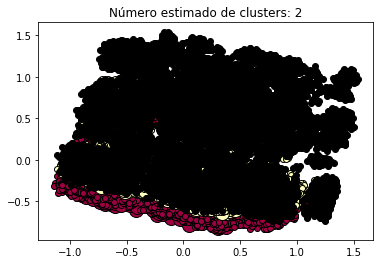

In [17]:
from sklearn.cluster import DBSCAN # Se aplica el algoritmo de clustering DBSCAN
from sklearn.datasets import make_moons # base de datos de las lunas 
import mglearn


epss = [0.1,0.3,0.5,0.7,0.9]
mins = [50,200, 500, 1000, 5000]

for eps in epss:
    for mi in mins:
        print ("Se realiza la prueba con eps:", eps)
        print ("y con minimas muestras:", mi)
        Modelo_DBSCAN_Basico = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto', leaf_size = 10, min_samples = mi) 
        Modelo_DBSCAN_Basico.fit_predict(Nuevos_Datos)
        Etiquetas = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas con ruido
        centros = Modelo_DBSCAN_Basico.components_ # Calcula la matriz de centros nucleares
        core_samples_mask = np.zeros_like(Etiquetas, dtype=bool)
        core_samples_mask[Modelo_DBSCAN_Basico.core_sample_indices_] = True     
        n_clusters_ = len(set(Etiquetas)) - (1 if -1 in Etiquetas else 0)
        n_ruido_ = list(Etiquetas).count(-1)
        Clases_Sin_Ruido = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas sin ruido

        unique_labels = set(Clases_Sin_Ruido)
        colors = [pyplot.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        print('Número estimado de datos con ruido: %d' % n_ruido_)

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Los puntos negros significan datos con ruido y que no pudieron ser agrupados
                col = [0, 0, 0, 1]

            class_member_mask = (Clases_Sin_Ruido == k)

            xy = Nuevos_Datos[class_member_mask & core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = Nuevos_Datos[class_member_mask & ~core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        #print("Para ", ncenters, " Clusters: ")   
        for i in range (len(np.unique(Etiquetas)) -1):
            print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))

        pyplot.title('Número estimado de clusters: %d' % n_clusters_)
        pyplot.show()

## GK-Means

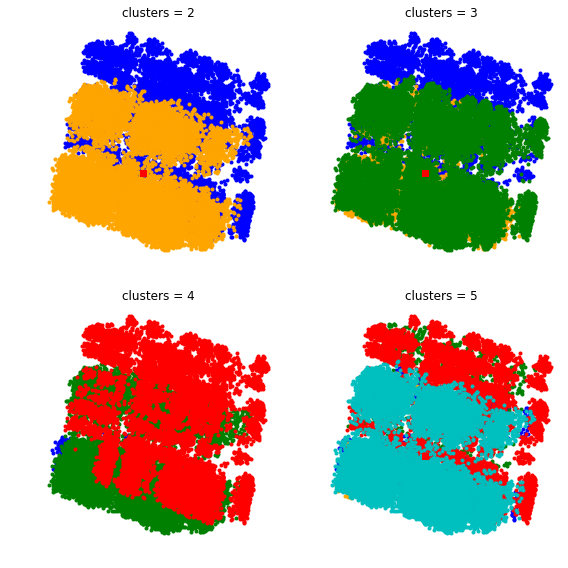

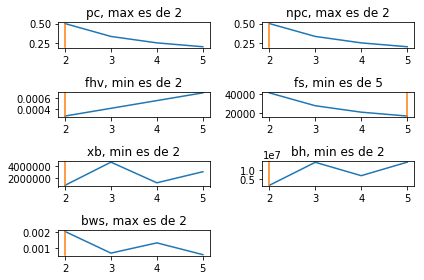

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy
from skcmeans.algorithms import Probabilistic, GustafsonKesselMixin # Algoritmo GK probabilístico

from cvi import * # Indices de validación interna

# cvi es una librería desarrollada por 99991
# ir a la url: https://github.com/99991/FuzzyClustering/blob/master/cvi.py
# pip install git+git://github.com/bm424/scikit-cmeans.git@master


class GKProbabilistic(Probabilistic, GustafsonKesselMixin):
    pass
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))
resultados = []
cs = np.arange(2, 6) # Rango de número mínimo y máximo de clusters
mantener_valor_aleatorio = check_random_state(1000)

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
    Ajuste = modelo_GK.fit(Nuevos_Datos)
    U = Ajuste.calculate_memberships(Nuevos_Datos)
    centros = Ajuste.calculate_centers(Nuevos_Datos)
    cluster_membership = np.argmax(U.T, axis=0)
    
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off')
    
    resultados.append([])
    for method in methods:
        resultado = method(Nuevos_Datos, U.T, centros, m = 2)
        resultados[-1].append(resultado)

plt.tight_layout()
plt.show()

resultados = np.array(resultados)

ny = 4
nx = 2

for i, method in enumerate(methods):
    plt.subplot(ny, nx, 1 + i)
    column = resultados[:, i]
    plt.plot(cs, column)
    if targets[i] == "min":
        ncenters = cs[np.argmin(column)]
    else:
        ncenters = cs[np.argmax(column)]
    plt.title("%s, %s es de %d"%(method.__name__, targets[i], ncenters))   
    plt.plot([ncenters, ncenters],[np.min(column), np.max(column)])

plt.tight_layout()
plt.show()

In [16]:
# Por consiguiente, la base de datos con datos y etiquetas sería con 3 clases

ncenters = 2

modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
Ajuste = modelo_GK.fit(Nuevos_Datos)

U = Ajuste.calculate_memberships(Nuevos_Datos)

Target = np.argmax(U.T, axis=0)

print(len(Target))

Datos_para_clasificar = Nuevos_Datos

Clases = Target

print("Para ", ncenters, " Clusters: ")   
for i in range (len(np.unique(Clases))):       
    print("El total de datos de la clase ", i, " son: ", len(Clases[Clases==i]))

55816
Para  2  Clusters: 
El total de datos de la clase  0  son:  14714
El total de datos de la clase  1  son:  41102
